<a href="https://colab.research.google.com/github/akul-bharadwaj/Practical-GenAI/blob/main/flux_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring [black-forest-labs/FLUX.1-dev](https://huggingface.co/black-forest-labs/FLUX.1-dev)

###Quantized to run on T4 GPU. Source: [bitsandbytes](https://huggingface.co/docs/diffusers/main/en/quantization/bitsandbytes) {[Aritra Roy Gosthipaty](https://github.com/ariG23498), [Sayak Paul](https://github.com/sayakpaul)}


In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `flux_test` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `flux_test`


In [ ]:
!pip install diffusers transformers accelerate bitsandbytes -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 12.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1


In [ ]:
import torch

In [ ]:
from diffusers import BitsAndBytesConfig as DiffusersBitsAndBytesConfig
from transformers import BitsAndBytesConfig as TransformersBitsAndBytesConfig

from diffusers import FluxTransformer2DModel
from transformers import T5EncoderModel

quant_config = TransformersBitsAndBytesConfig(load_in_4bit=True,)

text_encoder_2_4bit = T5EncoderModel.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    subfolder="text_encoder_2",
    quantization_config=quant_config,
    torch_dtype=torch.float16,
)

quant_config = DiffusersBitsAndBytesConfig(load_in_4bit=True,)

transformer_4bit = FluxTransformer2DModel.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    subfolder="transformer",
    quantization_config=quant_config,
    torch_dtype=torch.float16,
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

In [ ]:
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    transformer=transformer_4bit,
    text_encoder_2=text_encoder_2_4bit,
    torch_dtype=torch.float16,
    device_map="balanced",
)

def generate_image(prompt, height=1024, width=1024):
    pipe_kwargs = {
        "prompt": prompt,
        "height": height,
        "width": width,
        "guidance_scale": 3.5,
        "num_inference_steps": 50,
        "max_sequence_length": 512,
    }
    image = pipe(**pipe_kwargs, generator=torch.manual_seed(0)).images[0]
    return image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [ ]:
prompt_1 = "a tiny astronaut hatching from an egg on the moon"
image_1 = generate_image(prompt_1)

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:446: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference.
  warnings.warn(


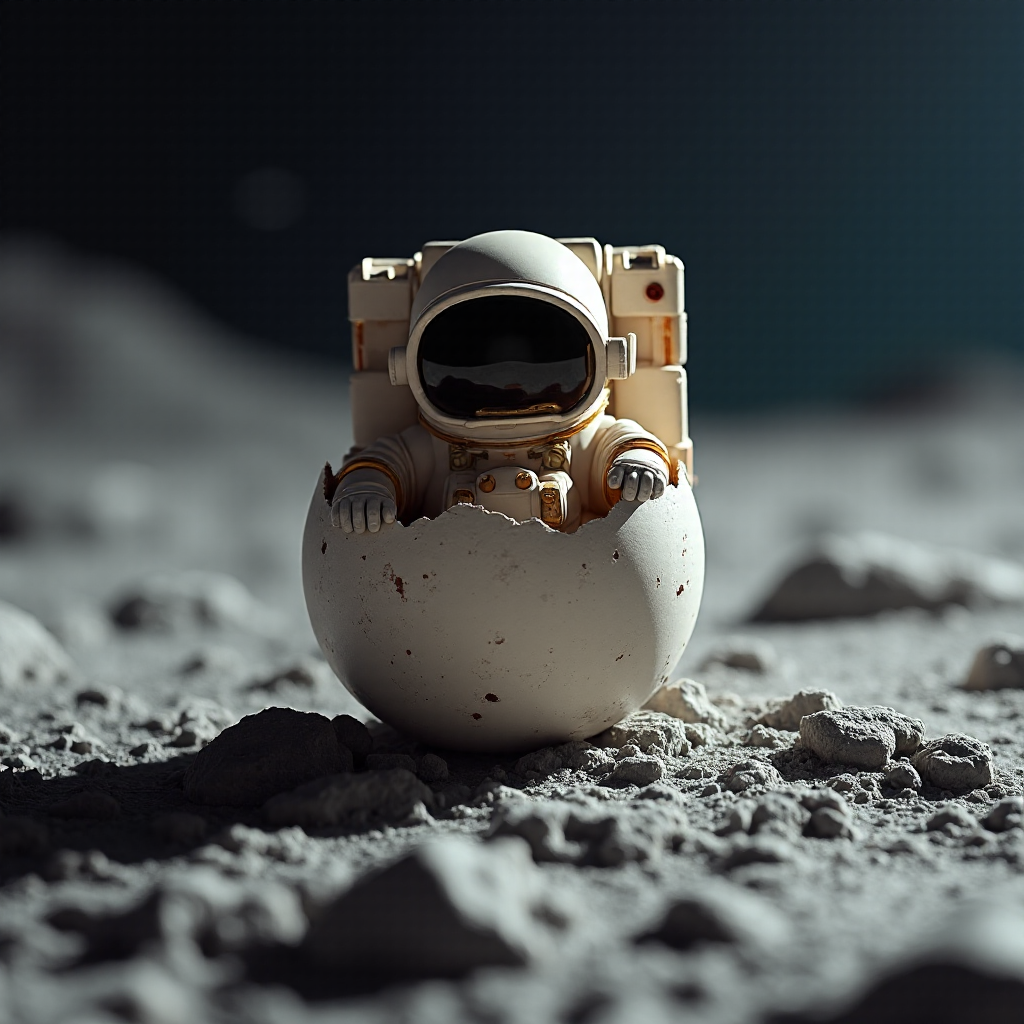

In [ ]:
image_1

In [ ]:
prompt_2 = "a boy standing in front of Google HQ in Bengaluru, India"
image_2 = generate_image(prompt_2)

  0%|          | 0/50 [00:00<?, ?it/s]

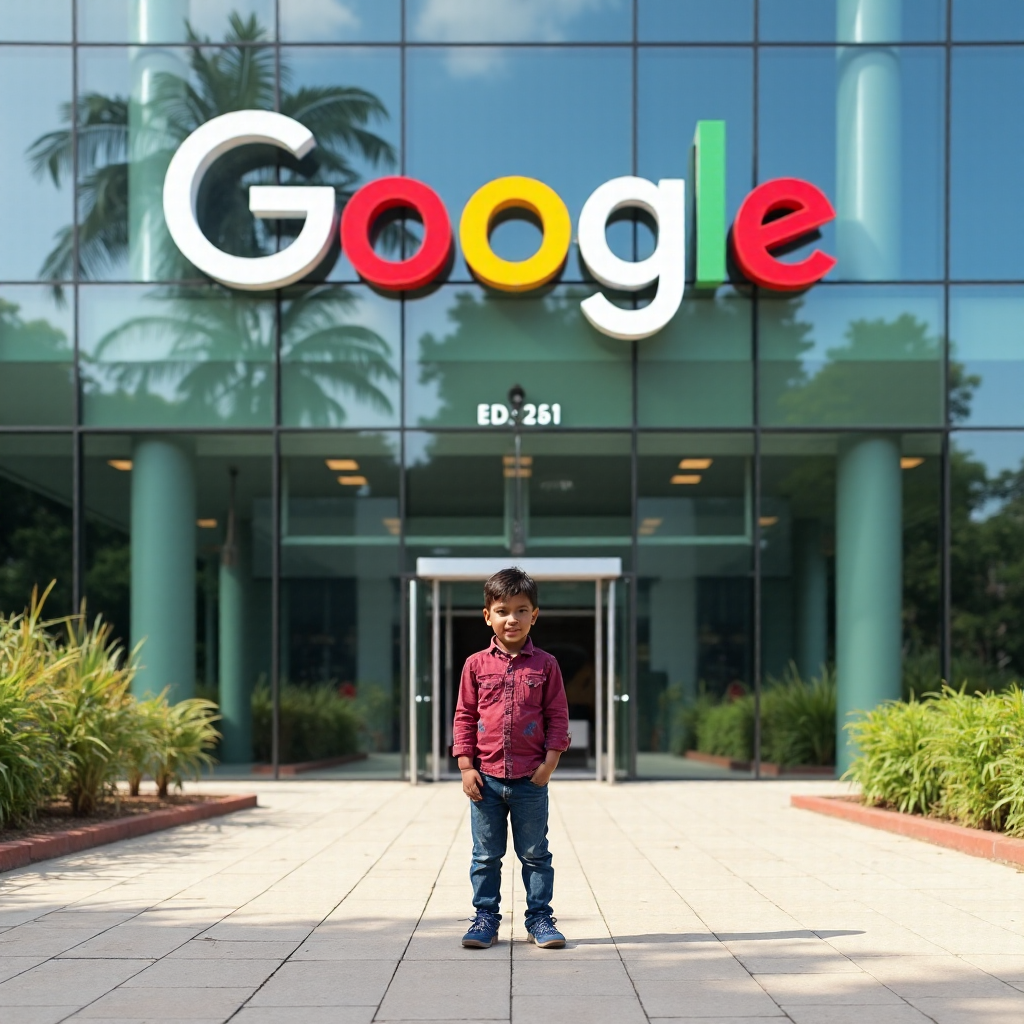

In [ ]:
image_2